In [46]:
import time

import matplotlib.pyplot as plt
import tensorflow as tf

from tfdiffeq import odeint

if tf.version.VERSION.startswith("1."):
    tf.enable_v2_behavior()


tf.keras.backend.set_floatx('float64')

device = 'cpu:0'

In [3]:
class Lorenz(tf.Module):

    def __init__(self, sigma=10., beta=8 / 3., rho=28., **kwargs):
        super().__init__(**kwargs)

        self.sigma = float(sigma)
        self.beta = float(beta)
        self.rho = float(rho)

    @tf.function
    def __call__(self, t, y):
        """ y here is [x, y, z] """
        X,Y,Z = tf.unstack(y)
        dx_dt = self.sigma * (Y - X)
        dy_dt = X * (self.rho - Z) - Y
        dz_dt = X * Y - self.beta * Z

        dL_dt = tf.stack([dx_dt, dy_dt, dz_dt])
        return dL_dt


In [4]:
t = tf.range(0.0, 100.0, 0.01, dtype=tf.float64)
initial_state = tf.convert_to_tensor([1., 1., 1.], dtype=tf.float64)

sigma = 10.
beta = 8. / 3.
rho = 28.

with tf.device(device):
    t1 = time.time()
    solution = odeint(Lorenz(sigma, beta, rho), initial_state, t).numpy()
    t2 = time.time()

print("Finished integrating ! Result shape :", solution.shape)
print("Time required (s): ", t2 - t1)

Finished integrating ! Result shape : (10000, 3)
Time required (s):  36.41679096221924


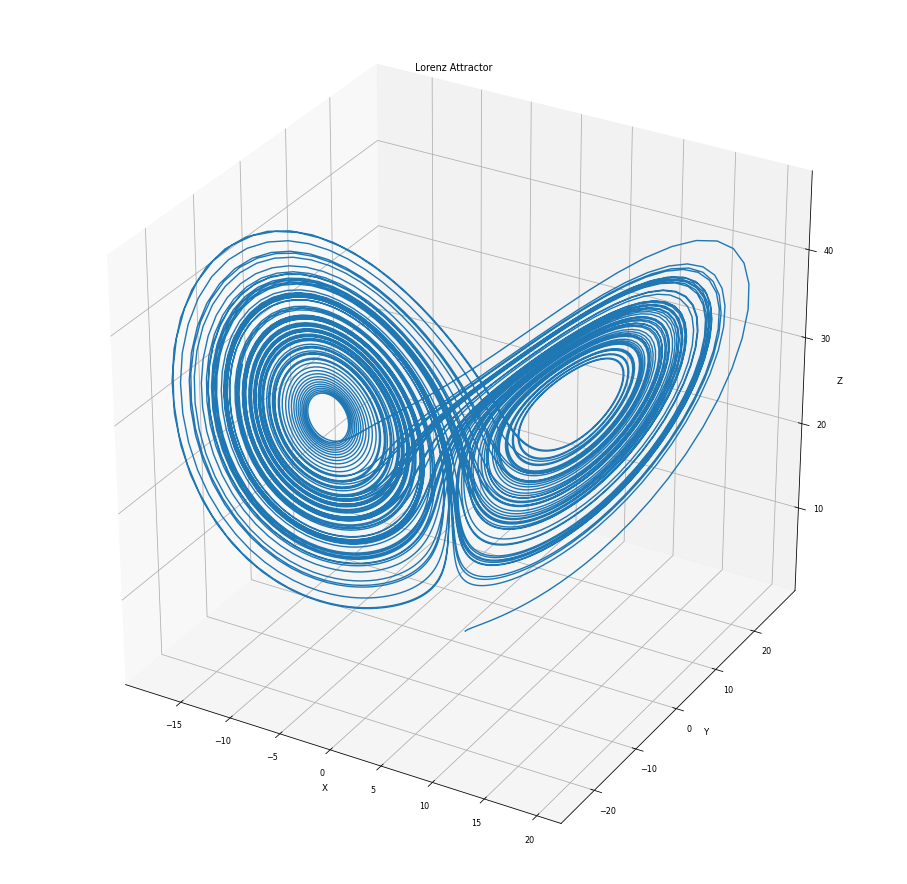

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # needed for plotting in 3d
_ = Axes3D

fig = plt.figure(figsize=(16, 16))
ax = fig.gca(projection='3d')
ax.set_title('Lorenz Attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(solution[:, 0], solution[:, 1], solution[:, 2])
plt.show()